# TASK-2

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import tsfel
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

## Q1


### Function for Decision Tree using sklearn

In [23]:
def DecisionTreeClassifierFunc(X_train,y_train,X_test,y_test):
    

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')


    conf_matrix = confusion_matrix(y_test, y_pred)

   

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
     # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


### 2.1.1 Decision Tree Classification on Raw accelerometer dataset.

Accuracy: 0.7221
Precision: 0.7212
Recall: 0.7221


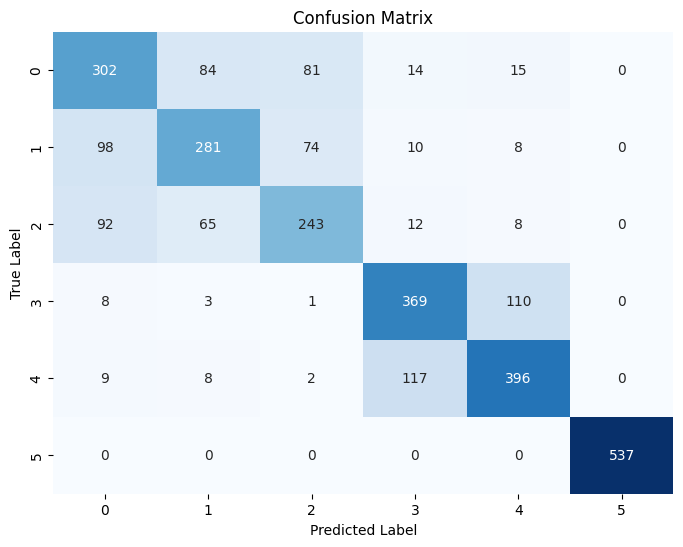

In [25]:
# Load the raw data
X_train_total_acc_x = np.loadtxt('HAR/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt')
X_train_total_acc_y = np.loadtxt('HAR/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt')
X_train_total_acc_z = np.loadtxt('HAR/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt')

X_train_body_acc_x = np.loadtxt('HAR/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt')
X_train_body_acc_y = np.loadtxt('HAR/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt')
X_train_body_acc_z = np.loadtxt('HAR/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt')

X_train_body_gyro_x = np.loadtxt('HAR/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt')
X_train_body_gyro_y = np.loadtxt('HAR/UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt')
X_train_body_gyro_z = np.loadtxt('HAR/UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt')

# Combine the data
X_train = np.concatenate([X_train_total_acc_x, X_train_total_acc_y, X_train_total_acc_z,
                           X_train_body_acc_x, X_train_body_acc_y, X_train_body_acc_z,
                           X_train_body_gyro_x, X_train_body_gyro_y, X_train_body_gyro_z], axis=1)

# Repeat for test data
X_test_total_acc_x = np.loadtxt('HAR/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt')
X_test_total_acc_y = np.loadtxt('HAR/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt')
X_test_total_acc_z = np.loadtxt('HAR/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt')

X_test_body_acc_x = np.loadtxt('HAR/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt')
X_test_body_acc_y = np.loadtxt('HAR/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt')
X_test_body_acc_z = np.loadtxt('HAR/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt')

X_test_body_gyro_x = np.loadtxt('HAR/UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt')
X_test_body_gyro_y = np.loadtxt('HAR/UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt')
X_test_body_gyro_z = np.loadtxt('HAR/UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt')

# Combine the test data
X_test = np.concatenate([X_test_total_acc_x, X_test_total_acc_y, X_test_total_acc_z,
                          X_test_body_acc_x, X_test_body_acc_y, X_test_body_acc_z,
                          X_test_body_gyro_x, X_test_body_gyro_y, X_test_body_gyro_z], axis=1)

X_train_raw  = pd.DataFrame(X_train)
X_test_raw = pd.DataFrame(X_test)
y_train_raw = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "y_train.txt"), sep='\s+', header=None)
y_test_raw = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/test", "y_test.txt"), sep='\s+', header=None)

DecisionTreeClassifierFunc(X_train_raw,y_train_raw,X_test_raw,y_test_raw)


### 2.1.2 Decision Tree Classification on TSFEL feature dataset.

Accuracy: 0.7954
Precision: 0.7963
Recall: 0.7954


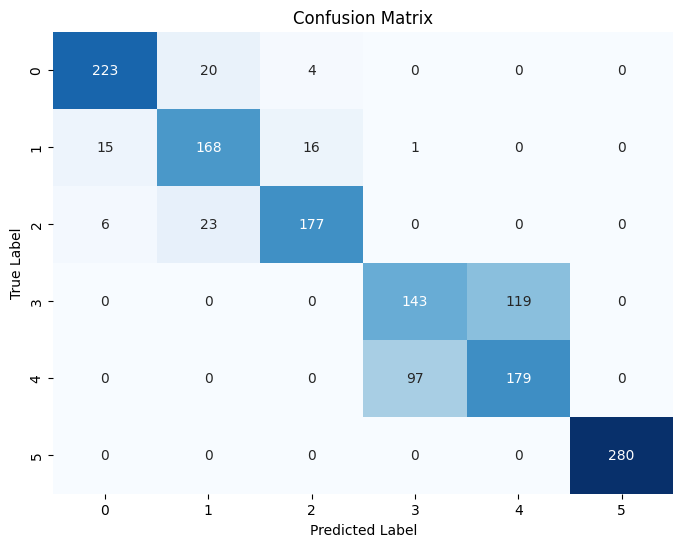

In [16]:
X_TSFEL = pd.read_csv("X_train_TSFEL.csv")
y = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "y_train.txt"), sep='\s+', header=None)

DecisionTreeClassifierFunc(X_TSFEL,y)

### 2.1.3 Decision Tree Classification on Feature dataset (X_train).

Accuracy: 0.9456
Precision: 0.9460
Recall: 0.9456


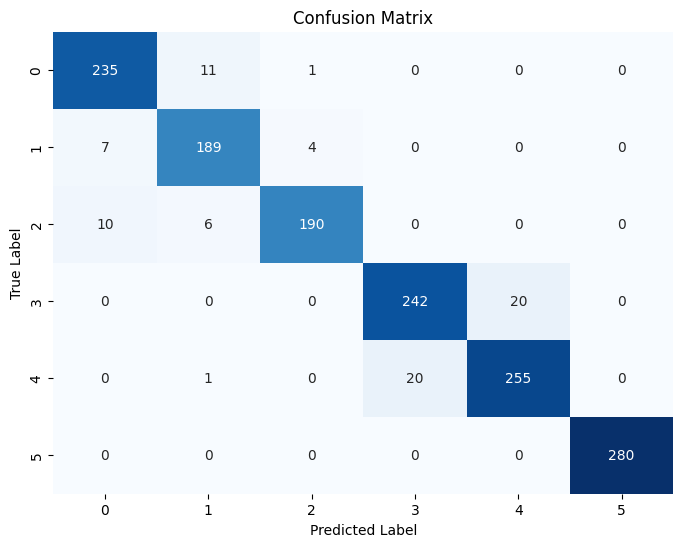

In [17]:
X_train = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "X_train.txt"), sep='\s+', header=None)
y = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "y_train.txt"), sep='\s+', header=None)

DecisionTreeClassifierFunc(X_train,y)

## Q2